<h2>Program to fit SIR model with real-life data:</h2>

R0 is 6.0200000000000005


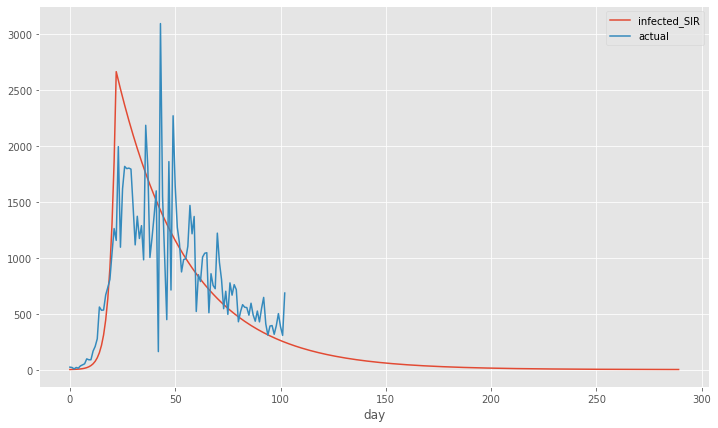

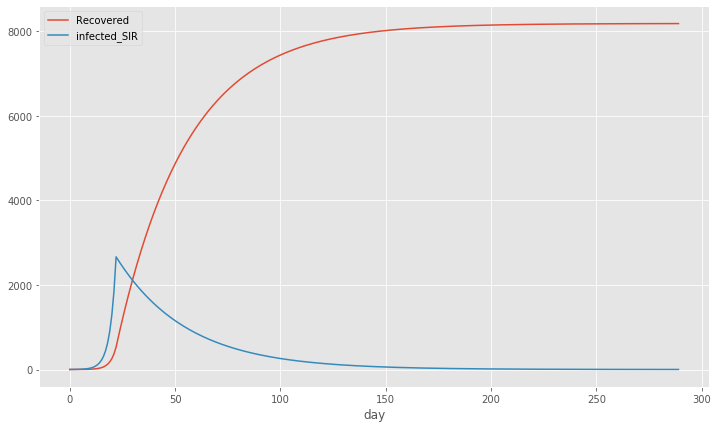

In [1]:
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

ori = pd.read_excel('book1.xlsx')

# Differential equations
def deriv_adjusted(state, t, N, beta, gamma):
    S, I, R = state
    
    beta = new_contactrate(beta, t)
    gamma = new_recoveryrate(gamma,t)
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return dS_dt, dI_dt, dR_dt

# Assuming constants to match original graph by trial and error
effectivecontactrate = 0.43 # beta
recoveryrate = 1/14 # gamma

def new_contactrate(contact_rate, day):
    if day > 22: # Approximate peak of daily cases
        return contact_rate*0.13
    else:
        return contact_rate
def new_recoveryrate(recovery_rate, day):
    if day > 22:
        return recovery_rate*1.2
    else:
        return recovery_rate

print("R0 is", effectivecontactrate / recoveryrate)


total_population = 12801989 #Total population of Pennsylvania
recovered = 0
infected = 1
susceptible = total_population - infected - recovered

days = range(0, 290)

ret = odeint(deriv_adjusted,
             [susceptible, infected, recovered],
             days,
             args=(total_population, effectivecontactrate, recoveryrate))
S_adj, I_adj, R_adj = ret.T


df = pd.DataFrame({
    'infected_SIR': I_adj,
    'Recovered': R_adj,
    'susceptible': S_adj,
    'day': days,
})

df1=pd.DataFrame({
    'actual': ori['case']
})

newdf= pd.concat([df, df1], ignore_index=False, axis=1)
plt.style.use('ggplot')
newdf.plot(x='day',
        y=['infected_SIR','actual'], figsize=(12,7))
plt.savefig('SIR.png')
newdf.plot(x='day', y=['Recovered','infected_SIR'], figsize=(12,7))
plt.savefig('rev_inf.png')

<h4>The infected cases become almost zero after approximately 200 days.</h4>

In [2]:
newdf['infected_SIR'].tail(10)

280    1.206461
281    1.170981
282    1.136543
283    1.103119
284    1.070677
285    1.039190
286    1.008628
287    0.978966
288    0.950175
289    0.922232
Name: infected_SIR, dtype: float64

<h4>Here, on day 287 cases become less than 1.</h4>

<h2>Therefore the pandemic will end in 287 Days. Value of R0 is 6.0200000000000005
</h2>

In [3]:
ori.head()

,date,positive,recovered,death,active,day,case
0,20200312,22,NaN,0,22,0,22
1,20200313,41,NaN,0,41,1,19
2,20200314,47,NaN,0,47,2,6
3,20200315,66,NaN,0,65,3,19
4,20200316,79,NaN,0,78,4,13


<h2>Analysis of real life cases in pennsylvania</h2>

<h4>Total active cases:</h4>

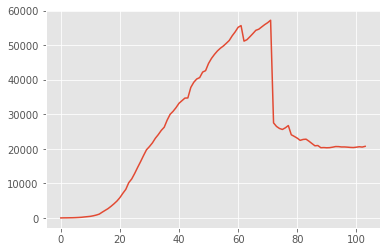

In [4]:
plt.plot(ori['day'],ori['active'])
plt.savefig('active.png')

<h4>The maximum active cases in pennsylvania stood at 57183. The peak occured on 21st may 2020. After this the active cases dropped very sharply to 27503.</h4>

In [5]:
ori['active'].max() #The maximum active cases in pennsylvania stood at 57183.

57183

In [6]:
ori[ori.active==57183].date #The peak occured on 21st may 2020. After this the active cases dropped very sharply to 27503.

70    20200521
Name: date, dtype: int64

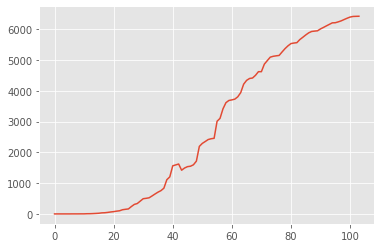

In [7]:
plt.plot(ori['day'],ori['death'])
plt.savefig('death.png')

 <h4>The number of death increased exponentiallly initially with the curve flatteing after 80 days.</h4>

<h2>Effect of Lockdown on COVID-19 cases in Pennslyvania.</h2>

<h4>Daily new cases:</h4>

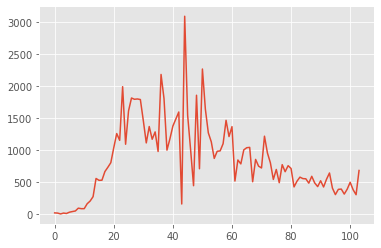

In [8]:
plt.plot(ori['day'],ori['case'])
plt.savefig('daily.png')

In [9]:
# Lockdown in Pennsylvania was imposed on 1st April 2020 through 2nd June 2020.

<h4>New cases during Lockdown:</h4>

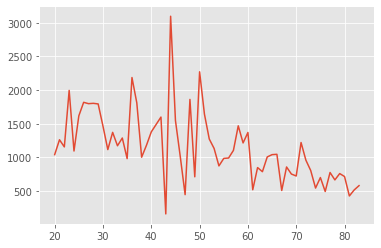

In [10]:
plt.plot(ori[(ori.day>=20) & (ori.day<=83)].day,ori[(ori.day>=20) & (ori.day<=83)].case) # New cases during Lockdown.
plt.savefig('ld.png')

<h4>New cases post-Lockdown:</h4>

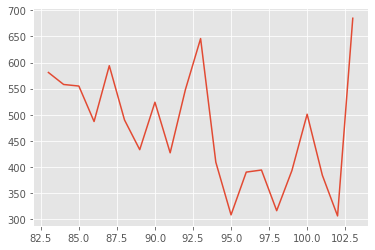

In [11]:
plt.plot(ori[(ori.day>=83)].day,ori[(ori.day>=83)].case) # New cases during post-Lockdown.
plt.savefig('pold.png')

<h4>New cases before Lockdown:</h4>

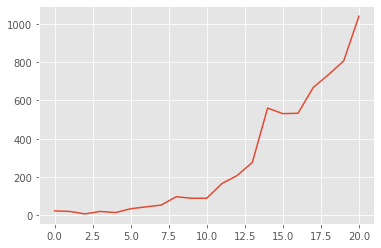

In [12]:
plt.plot(ori[(ori.day<=20)].day,ori[(ori.day<=20)].case,label="pre lockdown") 
plt.savefig('prld.png')

<h4>As we can see from the three graphs, pre lockdown, the number of daily infections increased rapidly. As the lockdown was imposed, the number of new cases began to dip. when the lockdown was removed, its effect could be seen a few days later when the daily cases began to rise again.</h4> 

<h2>SIR model if Lockdown wouldn't have been lifted</h2>

R0 is 2.94


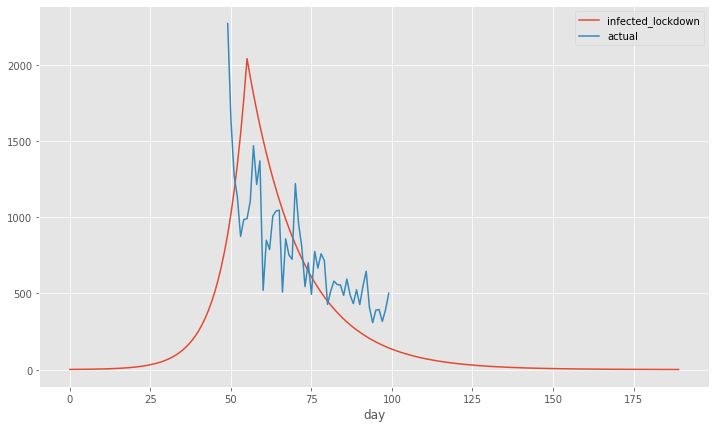

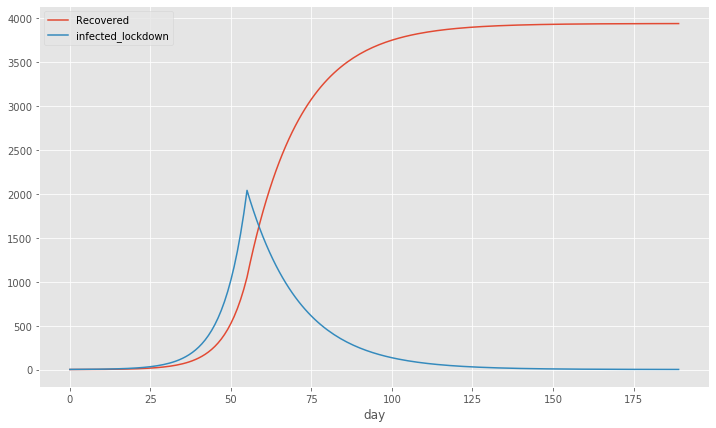

In [13]:
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

oril = ori[(ori.day>=50) & (ori.day<=100)]

# Differential equations
def deriv_adjusted(state, t, N, beta, gamma):
    S, I, R = state
    
    beta = new_contactrate(beta, t)
    gamma = new_recoveryrate(gamma,t)
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return dS_dt, dI_dt, dR_dt

# Assuming constants to match original graph by trial and error
effectivecontactrate = 0.21 # beta
recoveryrate = 1/14 # gamma

def new_contactrate(contact_rate, day):
    if day > 55: # Approximate peak of daily cases
        return contact_rate*0.12
    else:
        return contact_rate
def new_recoveryrate(recovery_rate, day):
    if day > 55:
        return recovery_rate*1.2
    else:
        return recovery_rate

print("R0 is", effectivecontactrate / recoveryrate)


total_population = 12801989 #Total population of Pennsylvania
recovered = 0
infected = 1
susceptible = total_population - infected - recovered

days = range(0, 190)

ret = odeint(deriv_adjusted,
             [susceptible, infected, recovered],
             days,
             args=(total_population, effectivecontactrate, recoveryrate))
S_adj, I_adj, R_adj = ret.T


df = pd.DataFrame({
    'infected_lockdown': I_adj,
    'Recovered': R_adj,
    'susceptible': S_adj,
    'day': days,
})

df1=pd.DataFrame({
    'actual': oril['case']
})

newdf1= pd.concat([df, df1], ignore_index=False, axis=1)
plt.style.use('ggplot')
newdf1.plot(x='day',
        y=['infected_lockdown','actual'], figsize=(12,7))
plt.savefig('SIR1.png')
newdf1.plot(x='day', y=['Recovered','infected_lockdown'], figsize=(12,7))
plt.savefig('rec_inf1.png')

In [14]:
newdf1['infected_lockdown'].tail(10)

180    1.057423
181    0.995324
182    0.936872
183    0.881852
184    0.830064
185    0.781317
186    0.735432
187    0.692242
188    0.651589
189    0.613323
Name: infected_lockdown, dtype: float64

<h4>Here, on day 181 cases become less than 1.</h4>

<h2>Therefore the pandemic will end in 181 Days. Value of R0 is 2.94
</h2>

<h4>Here it can be clearly seen that during lockdown the value of R0 drops sharply and effective contact rate(beta) is also reduced. The Pandemic has a probability of ending earlier than the previous case by more than a hundred days. Thus it more beneficial to extend the lockdown.</h4>